#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 1 (20 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A0_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 219155861     

# Student name: Naveen Chuka Radhakrishna




##**Background**
Selection of housing is always difficult for someone seeking for a suitable one as it includes various factors and preferences. People prefer to buy a house considering many criteria like- population, quality of life, financial capability, as well as social and natural environments around the housing block. In this assignment you will be helping people choosing suitable housing for them according to their needs.
##**Dataset**
**Dataset file name:** housing_dataset.csv

**Dataset description:** Dataset contains total 10 features (columns). It contains the location, housing age, population, number of families in a housing (block), number of rooms, average income of the families in that housing, ocean proximity and other informaiton. Each row indicates a record of a housing block containing the features mentioned earlier.

**Features:** 

1.   latitude (float): Latitude of the location of a housing in conventional geospace
2.   longitude (float): Longitude of the location of a housing in conventional geospace
3.   housing_age (int): Age of the housing in year, the higher number indicates the older housing
4.    total_rooms (int): Total number of rooms in a housing
5.    total_bedrooms (int): Total number of bedrooms in a housing
6.    population (int): Total population of a housing
7.    families (int): Total number of families living in a housing
8.    average_income (float): Average income of the member of a housing in a scale of Tousand Dollar Per Month
9.    ocean_proximity (string): Describing how close the housing is to the ocean
10.   house_value (int): Average individual house price of a housing in Dollers




##**Part-1: Basic Calculations:**  *(8 marks: 8 questions x 1 marks each)*


1.   Find the distances of the farthest and nearest housing blocks from the house block described in the first row of the dataset.

In [1]:
# INSERT your code here.
import pandas as pd  # import pandas library
# read.csv is used to read the data from the filr location
housing_Datasets= pd.read_csv("/content/sample_data/housing_dataset.csv") 
housing_Dataset=housing_Datasets

In [2]:
from math import cos, asin, sqrt, pi

#Function to Calcualte the distance between two distance points.
def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) 
#List to Hold all the distance from the first row of the dataset 
distance_km = []  

#for loop to find distance and append it to list distance_km

for i in range(0,housing_Dataset.shape[0],1):
    distance_km.append( distance(housing_Dataset.iloc[0,1],housing_Dataset.iloc[0,0],housing_Dataset.iloc[i,1],housing_Dataset.iloc[i,0]) )

housing_Dataset['distance_km'] = distance_km  #adding a column to Hosuing Data_Set 

print("Distance of the farthest Housing Block = " ,housing_Dataset['distance_km'].nlargest(1).iloc[0],'KM')
print("Distance of the Nearest Housing Block = ", housing_Dataset['distance_km'].nsmallest(2).iloc[-1],'KM')

Distance of the farthest Housing Block =  896.2777794337468 KM
Distance of the Nearest Housing Block =  0.8776598447105558 KM


2.   Calculate the average age of the house blocks near the ocean.

In [3]:
#Function to calculate the average age of the house blocks
# A housing dataset is used along with ocean_proximity column to find out the NEAR OCAN fields.
near_Bay=housing_Dataset[housing_Dataset['ocean_proximity']=='NEAR OCEAN'] 
print('The average age of the housing blocks is:')
near_Bay['housing_age'].mean(skipna= True) #To find the average of the housing age mean() method is used.

The average age of the housing blocks is:


29.347253574115875

3.   Find the income of the housing block with the most and least population density (per family).

In [4]:
#Fuction to calculate the moast and least population density of the housing block
#To find the population density bothe population and familes column is taken and divided to find out the populaton density and added in the housing dataset
housing_Dataset['population_Density']= housing_Dataset['population']/housing_Dataset['families']

# The population_Density column is taken in which the maximum value is taken
population_density_Max=housing_Dataset[housing_Dataset.population_Density==housing_Dataset.population_Density.max()]

# The population_Density column is taken in which the mininum value is taken
population_density_Min=housing_Dataset[housing_Dataset.population_Density==housing_Dataset.population_Density.min()]

print('average income of the most population density per family:',population_density_Max['average_income'])
print('average income of the least population density per family:',population_density_Min['average_income'])



average income of the most population density per family: 19006    10.2264
Name: average_income, dtype: float64
average income of the least population density per family: 11849    2.5893
Name: average_income, dtype: float64


4.   Calculate the price difference between the latest and oldest housing block from the dataset.

In [5]:
# INSERT your code here.
#Function to caluculate the price differnce between the latest and oldest housing block

#Housing dataset and housing age column is taken in which the max() method is used to find out the subscequent rows and house value column is taken to find the maximum of the latest housing block
house_Cost_Max=housing_Dataset[housing_Dataset.housing_age==housing_Dataset.housing_age.max()]
latest_Block=house_Cost_Max['house_value'].max()

# #Housing dataset and housing age column is taken in which the min() method is used to find out the subscequent rows and house value column is taken to find the maximum of the oldest housing block
house_Cost_Min=housing_Dataset[housing_Dataset.housing_age==housing_Dataset.housing_age.min()]
oldest_Block= house_Cost_Min['house_value'].max()

#differnce is found out for latest and oldest housing block 
differnce_Rate= latest_Block-oldest_Block
print('The price difference between the latest and oldest housing block',differnce_Rate)

The price difference between the latest and oldest housing block 308701


5.   Calculate the cheapest price per room from the dataset.

In [6]:
#The cheapest price per room is found from expensive_room column using min() method
housing_Dataset['priceper_Room']= housing_Dataset['house_value']/housing_Dataset['total_rooms']
print(" the cheapest price per room from the dataset:",housing_Dataset.priceper_Room.min())

 the cheapest price per room from the dataset: 1.595444807757357


6.   Calculate the population density (per family) for the most and least wealthy housing blocks in the dataset.

In [7]:
# INSERT your code here.
#Function to calculate the most and least wealthy housing blocks in the dataset

#Average income column and max() method is used to find the maximum house income and takes the subscequent rows and mean of the population density column is found
average_Income_Max=housing_Dataset[housing_Dataset.average_income==housing_Dataset.average_income.max()]
population_Density_Most= average_Income_Max['population_Density'].mean()

#Average income column and min() method is used to find the minimum house income and takes the subscequent rows and mean of the population density column is found
average_Income_Min=housing_Dataset[housing_Dataset.average_income==housing_Dataset.average_income.min()]
population_Density_Least= average_Income_Min['population_Density'].mean()
print('most wealthy housing blocks of',population_Density_Most)
print('least wealthy housing blocks of',population_Density_Least)


most wealthy housing blocks of 3.307545896889619
least wealthy housing blocks of 3.4754772079772085


7.   Calculate and print the total housing blocks located in the same place.

In [8]:
# INSERT your code here.
# gruopby() and size() method is used to find the size of the housing block of ocean proximity
housing_Dataset.groupby(['ocean_proximity']).size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

8.   Calculate the price of expensive room grouped by ocean proximity.

In [9]:
# INSERT your code here.
#Function to calculate the price of the expensive room
#groupby() and max() is used to find the expensive room
priceper_Room= housing_Dataset.groupby('ocean_proximity')['priceper_Room'].max()
print('The price of the expensive room grouped by ',priceper_Room)

The price of the expensive room grouped by  ocean_proximity
<1H OCEAN     22500.000000
INLAND        68750.000000
ISLAND          451.807229
NEAR BAY      62500.125000
NEAR OCEAN    23333.333333
Name: priceper_Room, dtype: float64


##**Part-2: Visualization:**  *(6 marks: 3 question x 2 marks each)*


1.   Draw the population scatter plot against housing age and another against ocean proximity. From the graph conclude an assumption.

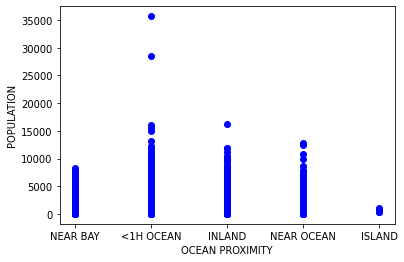

Text(0, 0.5, 'POPULATION')

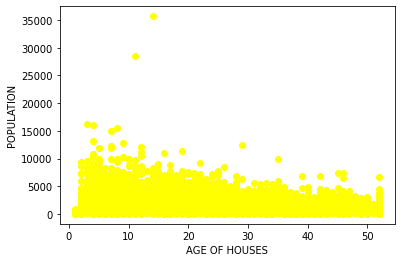

In [10]:
# INSERT your code here.
import matplotlib.pyplot as plt
#scatter plot is applied for ocean_proximity and population
plt.scatter(housing_Dataset['ocean_proximity'], housing_Dataset['population'], color='Blue')
#X-axis is heading 
plt.xlabel('OCEAN PROXIMITY')
#y-axis heading
plt.ylabel('POPULATION')
#show() is used to show the scatter plot
plt.show()

#scatter plot is applied for housing_age and population
plt.scatter(housing_Dataset['housing_age'], housing_Dataset['population'], color='yellow')
#X-axis is heading 
plt.xlabel('AGE OF HOUSES')
#y-axis heading
plt.ylabel('POPULATION')

a)In the scatter plot the age of houses vs population clearly shows that there are some anomoly detections and those anomoly are near 30000-35000. Other points and age of other houses are in between 0-15000. Moastly between 0-10 years there is more population compared to other ages.

b) In the scatter plot ocean proximity vs population some anamoly detections are found around 30000-35000. But other scatter points are found between 0-18000. In which <1H ocean has highest population compared to other regions. Secondly comes near ocean and follwed by other regions.

2.  Draw a bar diagram of average values of all suitable columns. (excluding latitude, longitude and ocean proximity of course).

(0.0, 6000.0)

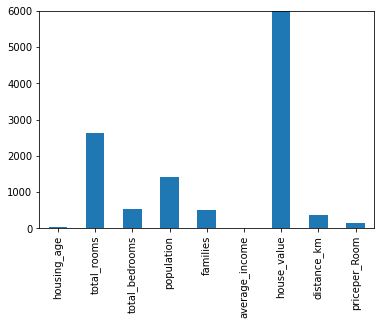

In [11]:
# INSERT your code here.
#bar chart is for all columns excluding the mentioned columns
housing_Datasets.loc[:, ~housing_Dataset.columns.isin(['longitude', 'latitude', 'ocean_proximity','population_Density'])].mean().plot(kind='bar').set_ylim(0,6000)


3.   Visualize the differences in housing prices from the average price of housing using a bar diagram.

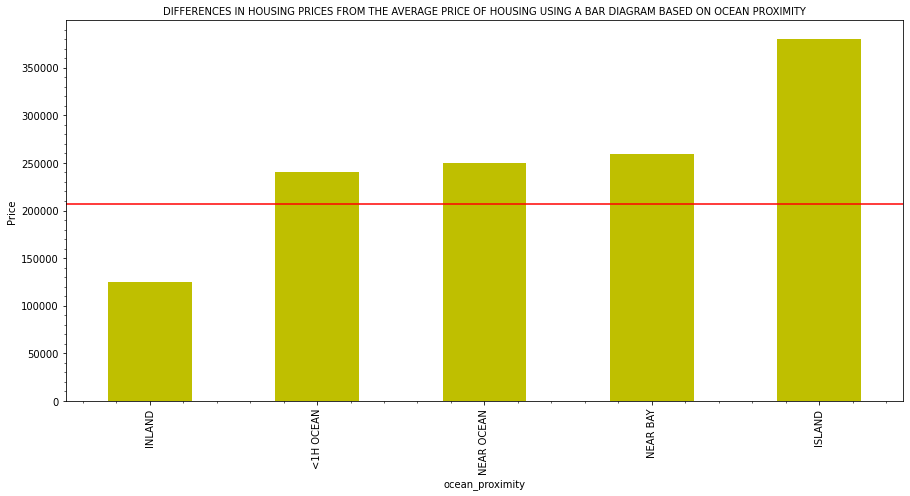

In [12]:
# INSERT your code here.
average_Housing  = housing_Dataset.groupby('ocean_proximity').mean()['house_value']

# your plot setup
fig,ax= plt.subplots()
average_Housing.sort_values().plot(kind="bar", ax=ax, color='y',figsize=(15,7))

plt.minorticks_on()
ax.tick_params(axis='x',which='minor')

ax.set_ylabel("Price")
ax.set_title(("Differences in housing prices from the average price of housing using a bar diagram based on ocean Proximity".upper()), fontsize=10)

# use axhline
mean = housing_Dataset['house_value'].mean()
ax.axhline(mean,color = 'r')

##**Part-3: File Management:**  *(6 marks: 2 question x 3 marks each)*

 

1.   Save the details of all housing blocks in a csv file having houses near oceans and  lower than the average of the housing value.

In [70]:
# INSERT your code here.
#to_csv() is used to export the dataset 
near_Ocean_Housingvalue= housing_Dataset[(housing_Dataset['ocean_proximity']=='NEAR OCEAN') & (housing_Dataset['house_value'] < housing_Dataset['house_value'].mean())]
near_Ocean_Housingvalue.to_csv('near_Ocean_Housingvalue.csv')






2.   Create a new housing dataset (a csv file) having only the location, total rooms and housing price information.






In [71]:
# INSERT your code here.
#to_csv() is used to export the dataset 
new_House_Dataset= housing_Dataset[['longitude','latitude','total_rooms','house_value']]
new_House_Dataset.to_csv('new_House_Dataset.csv')